# Predicting car prices

In this project, we will use the k-nearest neighbors algorithm to predict car's market price. Imagine if you want to sell a car but do not know how much you should sell it for, you want to set the selling price reasonable and relative to other cars in the market. We will try to answer that question. The dataset we will use is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile)

# Understanding the data

In [136]:
import pandas as pd

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
        'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.shape

(205, 26)

In [137]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The first attribute "symboling" corresponds to the degree to which the auto is more risky than its price indicates, values ranging from -3 being the safest to +3 being the riskiest. 

The second attribute “normalized-losses” represents the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

# Data cleaning

In [139]:
# only keep numerical columns 
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                'curb-weight', 'bore', 'stroke', 'compression-rate', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_cols]
numeric_cars.shape

(205, 14)

In [140]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [141]:
import numpy as np

numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [142]:
# drop na from price attribute as this is the value we are trying to pridict
numeric_cars.dropna(subset=['price'], inplace=True)
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [143]:
# use the mean to fill in na
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [144]:
# apply min max scalar normalization
price_col = numeric_cars['price']
numeric_cars = ((numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min()))
numeric_cars['price'] = price_col

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate model

Let us start off with univariate k-nearest neighbors model.

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, traget_col, df):
    train, test = train_test_split(df, test_size=0.5)

    knn = KNeighborsRegressor()
    knn.fit(train[training_col], train[traget_col])
    predictions = knn.predict(test[training_col])   
    mse = mean_squared_error(test[traget_col], predictions)
    
    return np.sqrt(mse)
    
rmse_map = {}    
for col in numeric_cars.columns.drop(['price']):
    rmse = knn_train_test([col], 'price', numeric_cars) 
    rmse_map[col] = rmse
    
rmse_series = pd.Series(rmse_map)
rmse_series.sort_values()

curb-weight          4563.474542
highway-mpg          4670.978135
horsepower           4872.357230
width                5304.103271
length               5394.287742
city-mpg             6090.339425
compression-rate     6559.435464
normalized-losses    6753.641724
bore                 7539.304422
wheel-base           7634.741538
stroke               7783.893523
peak-rpm             7968.226350
height               9023.583686
dtype: float64

The "curb-weight" attribute produced the least rmse value, meaning the "curb-weight" attribute is a good candidate to train the model and predict the car price. Let us explore using different **k** values and see if that changes the prediction.

In [151]:
from collections import OrderedDict

def k_knn_train_test(training_col, traget_col, df):
    train, test = train_test_split(df, test_size=0.5)
    
    k_rmses = OrderedDict()
    k_values = [1,3,5,7,9]
    for k in k_values:
        knn = KNeighborsRegressor(k)
        knn.fit(train[training_col], train[traget_col])
        predictions = knn.predict(test[training_col])   
        mse = mean_squared_error(test[traget_col], predictions)
        k_rmses[k] = np.sqrt(mse)
        
    return k_rmses
    
k_rmse_map = {}    
for col in numeric_cars.columns.drop(['price']):
    rmse = k_knn_train_test([col], 'price', numeric_cars) 
    k_rmse_map[col] = rmse

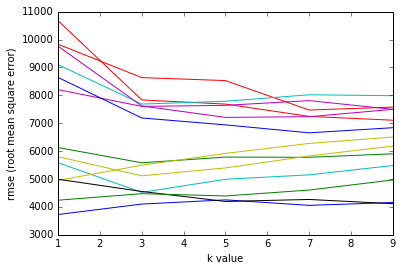

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_map.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('rmse (root mean square error)')

After k=5 the most of the rmse tends to flactuate less and stablizes.

# Multivariate model

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [153]:
# find the average rmse for each feature
feature_avg_rmse = {}
for k,v in k_rmse_map.items():
    rmses = list(v.values())
    avg_rmse = np.sum(rmses) / len(rmses)
    feature_avg_rmse[k] = avg_rmse
    
sorted_feature_avg_rmse = pd.Series(feature_avg_rmse)
sorted_feature_avg_rmse = sorted_feature_avg_rmse.sort_values()
sorted_feature_avg_rmse

horsepower           4058.603767
curb-weight          4424.372737
width                4535.487494
city-mpg             5145.460853
highway-mpg          5664.038330
wheel-base           5828.139021
length               5835.107855
height               7252.288414
peak-rpm             7750.402867
stroke               7863.343367
compression-rate     8108.542505
normalized-losses    8115.181079
bore                 8408.252837
dtype: float64

In [157]:
# use the best n numbers of feature to train and test the model
n_feature_rmse = {}    
for n in range(2,6):
    rmse = knn_train_test(sorted_feature_avg_rmse.index[:n], 'price', numeric_cars) 
    n_feature_rmse[n] = rmse    
n_rmse    

{2: 3134.1133496280618,
 3: 2983.7328055724943,
 4: 2631.7679206417147,
 5: 2918.3950708742245}

# Hyperparameter Tuning

In [158]:
def k_knn_train_test(training_col, traget_col, df):
    train, test = train_test_split(df, test_size=0.5)
    
    k_rmses = OrderedDict()
    for k in range(1,25):
        knn = KNeighborsRegressor(k)
        knn.fit(train[training_col], train[traget_col])
        predictions = knn.predict(test[training_col])   
        mse = mean_squared_error(test[traget_col], predictions)
        k_rmses[k] = np.sqrt(mse)
        
    return k_rmses

n_feature_k_rmse = {}
for n in range(2,6):
    k_rmses = k_knn_train_test(sorted_feature_avg_rmse.index[:n], 'price', numeric_cars) 
    n_feature_k_rmse[n] = k_rmses    
n_feature_k_rmse   

{2: OrderedDict([(1, 2704.3614352148325),
              (2, 3016.6896140840827),
              (3, 3034.365631837859),
              (4, 3091.6052620822493),
              (5, 3171.3260349888374),
              (6, 3472.3971674563463),
              (7, 3586.92079830258),
              (8, 3691.5874086787976),
              (9, 3798.117600139048),
              (10, 3935.985128199285),
              (11, 4028.062643191493),
              (12, 4076.4796350699785),
              (13, 4077.4112411759274),
              (14, 4207.21838987676),
              (15, 4309.5819392476005),
              (16, 4385.487807784815),
              (17, 4383.182417897787),
              (18, 4376.71829688981),
              (19, 4397.767056048191),
              (20, 4395.244191723167),
              (21, 4410.62752810624),
              (22, 4430.092148584645),
              (23, 4478.448812271453),
              (24, 4526.693416274807)]),
 3: OrderedDict([(1, 3291.261816770986),
              (2, 3090

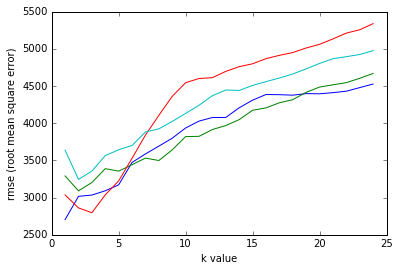

In [159]:
for k,v in n_feature_k_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('rmse (root mean square error)')

We see a trend that higher k value result in higher rmse. Next step could be to use the k-fold cross validation instead of test/train validation and see it performs better.